Source: http://stamfordresearch.com/scikit-learn-perceptron/
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron
- http://scikit-learn.org/stable/modules/linear_model.html#perceptron

The Perceptron is another simple algorithm suitable for large scale learning. By default:

1. It does not require a learning rate.
2. It is not regularized (penalized).
3. It updates its model only on mistakes.
The last characteristic implies that the Perceptron is slightly faster to train than SGD with the hinge loss and that the resulting models are sparser.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron

# Accuracy classification score
from sklearn.metrics import accuracy_score

# needed to show the plots inline
%matplotlib inline

In [32]:
# Data
X = np.array([
    [2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5],
    [2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
]).T

# Labels
y = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [33]:
X.shape, y.shape

((14, 2), (14,))

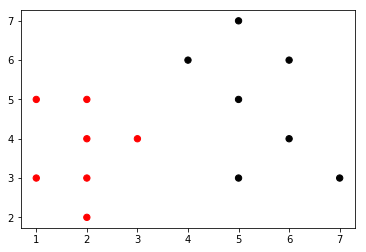

In [34]:
colormap = np.array(['r', 'k'])
plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)

#### Work some magic

In [14]:
# Create the model
clf = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      max_iter=None, n_iter=100, n_jobs=1, penalty=None, random_state=None,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [18]:
# print the results
print('Prediction' + str(clf.predict(X)))
print('Actual    ' + str(y))
print('Accuracy  ' + str(accuracy_score(y_true=clf.predict(X), y_pred=y)))

Prediction[0 0 0 1 1 0 0 1 0 0 1 1 1 1]
Actual    [0 0 0 1 1 0 0 1 0 0 1 1 1 1]
Accuracy  1.0


#### Plot the Decision Boundary
- `w·x + b = 0`

In [21]:
# learned parameters
print('Coefficient ' + str(clf.coef_))
print('Bias        ' + str(clf.intercept_))

Coefficient [[ 0.034 -0.014]]
Bias        [-0.048]


0.689610198847 7.31038980115


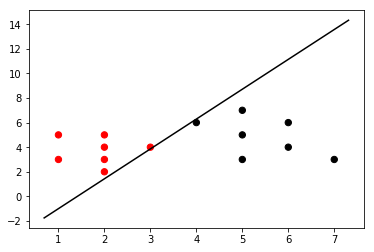

In [43]:
# Plot the original data
def plot_decision_boundary(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)
    xmin, xmax = plt.xlim()
    print(xmin, xmax)
    w = w
    b = b
    a = -w[0]/w[1]  # slope of decision boundary line
    x_plot = np.linspace(xmin, xmax)
    y_plot = a * x_plot - b/w[1]
    
    # Plot the line
    plt.plot(x_plot, y_plot, 'k-')
plot_decision_boundary(X=X, y=y, w=clf.coef_[0], b=clf.intercept_[0])

#### Perceptron from the scratch
- 参考UCSanDiegoX - DSE220x Machine Learning Fundamentals, week6

In [162]:
def perceptron_self(X, y, n_iter, a=0.2):
    m, n = X.shape
    w = np.zeros([1, n])
    b = 0
    y_class = np.unique(y)  # two classes, eg 0 or 1
    for j in np.arange(n_iter):
        for i in np.arange(m):
#             print(i)
            h_value = np.dot(w, X[i].T) + b
#             print(h_value)
            if y[i] == y_class[0]:  # set all y belongs to the first class to 1
                y_temp  = 1
            else:
                y_temp = -1  # set all y belongs to the second class to -1
            if h_value >= 0:  # if predicted value >= 0, h = 1
                h = 1
            else:
                h = -1    # if predicted value < 0, h = -1
            if h*y_temp <= 0:  # if point misclassified, update w and b
                w += a * y_temp * X[i]  #  get this from the derivation of loss function, loss = -y(w·x + b)
                b += a * y_temp
    return w, b

In [163]:
w_new, b_new = perceptron_self(X, y, n_iter=17, a=1)

In [164]:
w_new, b_new

(array([[-12.,   5.]]), 17)

0.689610198847 7.31038980115


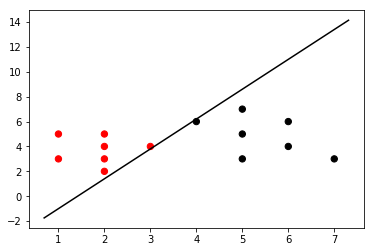

In [165]:
plot_decision_boundary(X=X, y=y, w=w_new[0], b=b_new)

In [37]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [64]:
np.unique(y)[0]

0